1. Import everything

In [1]:
from matplotlib import pyplot as plt

import cv2 as cv
cv.__version__

'4.0.1'

2. Load the input image and show its dimensions, 
keeping in mind that images are represented as a multi-dimensional NumPy array 
with shape № rows (height) x, № columns (width) x, № channels (depth).

In [2]:
image = cv.imread('picture_2.jpg')
(h, w, d) = image.shape
print("width = {}, height = {}, depth = {}".format(w, h, d))

width = 967, height = 643, depth = 3


3. Display the input and grayscale image. As openCV loads in BGR format by default, 
we want to show it in RGB.

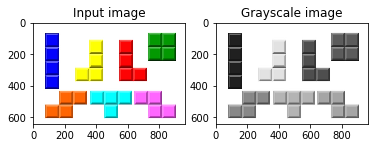

In [3]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Input image")

plt.subplot (1, 2, 2)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
plt.title('Grayscale image')
plt.show()

4. Blur the gray image and apply Canny algorithm

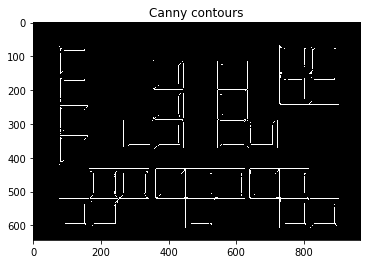

In [4]:
gray_blur = cv.GaussianBlur(gray, (5, 5), 0)
image_canny = cv.Canny(gray_blur, 0, 65)
plt.title('Canny contours')
plt.imshow(cv.cvtColor(image_canny, cv.COLOR_BGR2RGB))
plt.show()

5. Threshold the gray image

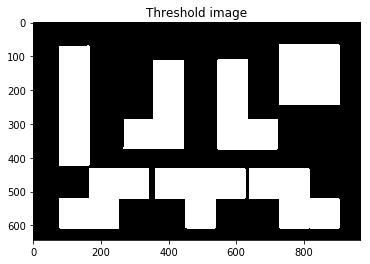

In [5]:
gray_thresh = cv.threshold(gray_blur, 240, 255, cv.THRESH_BINARY_INV)[1]
plt.title('Threshold image')
plt.imshow(cv.cvtColor(gray_thresh, cv.COLOR_BGR2RGB))
plt.show()

6. Erode and dilate the image

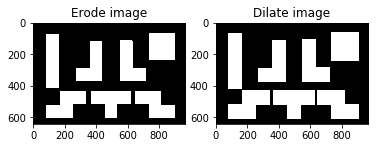

In [6]:
gray_thresh = cv.erode(gray_thresh, None, iterations=5)
gray_dilate = cv.dilate(gray_thresh, None, iterations=5)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(gray_thresh, cv.COLOR_BGR2RGB))
plt.title("Erode image")

plt.subplot (1, 2, 2)
plt.imshow(cv.cvtColor(gray_dilate, cv.COLOR_BGR2RGB))
plt.title('Dilate image')
plt.show()

7. Get contours of erode image

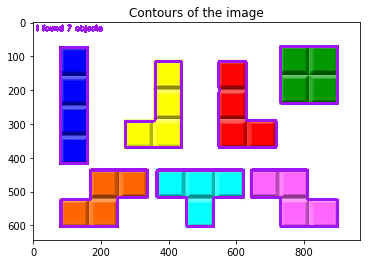

In [7]:
output_contours = image.copy()
contours, hierarchy = cv.findContours(gray_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv.drawContours(output_contours, [cnt], 0, (240, 20, 159), 8)
    
cv.putText(output_contours, "I found {} objects".format(len(contours)), (10, 25), cv.FONT_HERSHEY_SIMPLEX, 0.7,
            (240, 20, 159), 5)

plt.title('Contours of the image')
plt.imshow(cv.cvtColor(output_contours, cv.COLOR_BGR2RGB))
plt.show()

8. Cut figures by mask

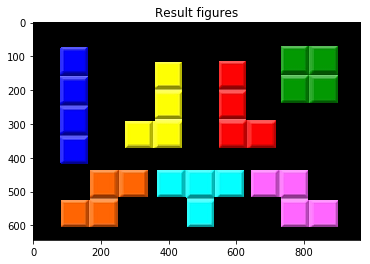

In [8]:
mask = gray_thresh.copy()
output = cv.bitwise_and(image, image, mask=mask)

plt.title('Result figures')
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()
